# NASA Mars News

In [21]:
# import dependencies

from bs4 import BeautifulSoup
import requests
from splinter import Browser
import pandas as pd
from selenium import webdriver
import time

In [22]:
driver = webdriver.Chrome()

In [23]:
# NASA Mars news url

url = 'https://mars.nasa.gov/news/'

In [24]:
# retrieve the page
driver.get(url)
time.sleep(5)

html = driver.page_source

# create BeautifulSoup object
soup = BeautifulSoup(html, 'lxml')

<!DOCTYPE html>
<!--[if lte IE 9]> <p class="browsehappy">You are using an <strong>outdated</strong> browser. Please <a href="http://browsehappy.com/">upgrade your browser</a> to improve your experience.</p> <![endif]-->
<html class="no-flash cookies geolocation svg picture canvas video webgl srcdoc supports no-hiddenscroll touchevents fullscreen flexbox cssanimations flexboxlegacy no-flexboxtweener csstransforms csstransforms3d csstransitions preserve3d -webkit-" lang="en" style="" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <script src="//api-public.addthis.com/url/shares.json?url=https%3A%2F%2Fmars.nasa.gov%2Fnews%2F%3Fpage%3D0%26per_page%3D40%26order%3Dpublish_date%2Bdesc%252Ccreated_at%2Bdesc%26search%3D%26category%3D19%252C165%252C184%252C204%26blank_scope%3DLatest&amp;callback=_ate.cbs.rcb_bvqv0" type="text/javascript">
  </script>
  <script src="//www.reddit.com/api/info.json?url=https%3A%2F%2Fmars.nasa.gov%2Fnews%2F%3Fpage%3D0%26per_page%3D40%26order%3Dpublis
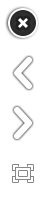
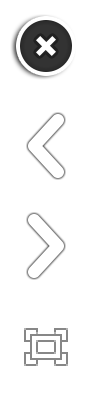
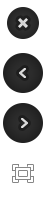
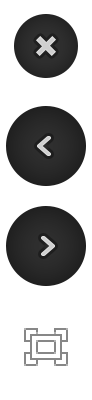
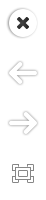
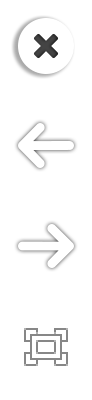
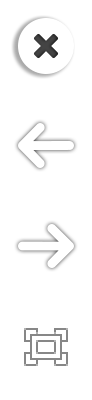
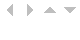

In [25]:
print(soup.prettify())

In [27]:
title = soup.find('div', class_='bottom_gradient').text
print(title)

paragraph = soup.find('div', class_='rollover_description_inner').text
print(paragraph)

NASA Engineers Dream Big with Small Spacecraft
The first CubeSat mission to deep space will launch in May.


# JPL Mars Space Images - Featured Image

In [28]:
# visit the url for JPL's Featured Space Image

img_url = 'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars'

In [59]:
# import dependency for splinter

from splinter import Browser


In [30]:
# use splinter to navigate the site and find the image url for the current Featured Mars Image
# and assign the url string to a variable called featured_image_url

executable_path = {'executable_path': './chromedriver'}
browser = Browser('chrome', **executable_path)

browser.visit(img_url)

In [31]:
# click the "FULL IMAGE" button for the featured image

browser.click_link_by_id('full_image')
time.sleep(5)

In [33]:
# click the "more info" button then click on the image

more_info_elem = browser.find_link_by_partial_text('more info')
more_info_elem.click()

In [195]:
featured_image_url = browser.find_by_tag('img')[6]['src']
print(featured_image_url)


https://www.jpl.nasa.gov/spaceimages/images/largesize/PIA16565_hires.jpg


# Mars Weather

In [201]:
# twitter url
twitter_url = 'https://twitter.com/marswxreport?lang=en'

# Retrieve page with the requests module
response_twitter = requests.get(twitter_url) 

# create BeautifulSoup object
soup = BeautifulSoup(response_twitter.text, 'html.parser')

In [202]:
# examine the results

print(soup.prettify())

<!DOCTYPE html>
<html data-scribe-reduced-action-queue="true" lang="en">
 <head>
  <meta charset="utf-8"/>
  <script nonce="U6q82yuuzWnHi5+MpkTs3A==">
   !function(){window.initErrorstack||(window.initErrorstack=[]),window.onerror=function(r,i,n,o,t){r.indexOf("Script error.")>-1||window.initErrorstack.push({errorMsg:r,url:i,lineNumber:n,column:o,errorObj:t})}}();
  </script>
  <script id="bouncer_terminate_iframe" nonce="U6q82yuuzWnHi5+MpkTs3A==">
   if (window.top != window) {
  window.top.postMessage({'bouncer': true, 'event': 'complete'}, '*');
}
  </script>
  <script id="swift_action_queue" nonce="U6q82yuuzWnHi5+MpkTs3A==">
   !function(){function e(e){if(e||(e=window.event),!e)return!1;if(e.timestamp=(new Date).getTime(),!e.target&&e.srcElement&&(e.target=e.srcElement),document.documentElement.getAttribute("data-scribe-reduced-action-queue"))for(var t=e.target;t&&t!=document.body;){if("A"==t.tagName)return;t=t.parentNode}return i("all",o(e)),a(e)?(document.addEventListener||(e=o(

In [205]:
results_twitter = soup.find('div', class_='js-tweet-text-container')

mars_weather = results_twitter.find('p', class_="TweetTextSize TweetTextSize--normal js-tweet-text tweet-text").text
print(mars_weather)

Sol 2030 (April 22, 2018), Sunny, high -4C/24F, low -73C/-99F, pressure at 7.21 hPa, daylight 05:25-17:21


# Mars Facts

In [234]:
# facts url

facts_url = 'https://space-facts.com/mars/'

In [235]:
# scrape the table data from the page

tables = pd.read_html(facts_url)
tables

[                      0                              1
 0  Equatorial Diameter:                       6,792 km
 1       Polar Diameter:                       6,752 km
 2                 Mass:  6.42 x 10^23 kg (10.7% Earth)
 3                Moons:            2 (Phobos & Deimos)
 4       Orbit Distance:       227,943,824 km (1.52 AU)
 5         Orbit Period:           687 days (1.9 years)
 6  Surface Temperature:                  -153 to 20 °C
 7         First Record:              2nd millennium BC
 8          Recorded By:           Egyptian astronomers]

In [236]:
# create a dataframe

facts_df = tables[0]
facts_df.columns = ['Description', 'Value']
facts_df

,Description,Value
0,Equatorial Diameter:,"6,792 km"
1,Polar Diameter:,"6,752 km"
2,Mass:,6.42 x 10^23 kg (10.7% Earth)
3,Moons:,2 (Phobos & Deimos)
4,Orbit Distance:,"227,943,824 km (1.52 AU)"
5,Orbit Period:,687 days (1.9 years)
6,Surface Temperature:,-153 to 20 °C
7,First Record:,2nd millennium BC
8,Recorded By:,Egyptian astronomers


In [237]:
# reset the index

facts_df.set_index('Description', inplace=True)
facts_df

,Value
Description,
Equatorial Diameter:,"6,792 km"
Polar Diameter:,"6,752 km"
Mass:,6.42 x 10^23 kg (10.7% Earth)
Moons:,2 (Phobos & Deimos)
Orbit Distance:,"227,943,824 km (1.52 AU)"
Orbit Period:,687 days (1.9 years)
Surface Temperature:,-153 to 20 °C
First Record:,2nd millennium BC
Recorded By:,Egyptian astronomers


In [238]:
# convert to HTML table string

html_table = facts_df.to_html()
html_table

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Value</th>\n    </tr>\n    <tr>\n      <th>Description</th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Equatorial Diameter:</th>\n      <td>6,792 km</td>\n    </tr>\n    <tr>\n      <th>Polar Diameter:</th>\n      <td>6,752 km</td>\n    </tr>\n    <tr>\n      <th>Mass:</th>\n      <td>6.42 x 10^23 kg (10.7% Earth)</td>\n    </tr>\n    <tr>\n      <th>Moons:</th>\n      <td>2 (Phobos &amp; Deimos)</td>\n    </tr>\n    <tr>\n      <th>Orbit Distance:</th>\n      <td>227,943,824 km (1.52 AU)</td>\n    </tr>\n    <tr>\n      <th>Orbit Period:</th>\n      <td>687 days (1.9 years)</td>\n    </tr>\n    <tr>\n      <th>Surface Temperature:</th>\n      <td>-153 to 20 °C</td>\n    </tr>\n    <tr>\n      <th>First Record:</th>\n      <td>2nd millennium BC</td>\n    </tr>\n    <tr>\n      <th>Recorded By:</th>\n      <td>Egyptian astronomers</td>\n    </tr>

In [239]:
# remove the newline code
html_table.replace('\n', '')

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Value</th>    </tr>    <tr>      <th>Description</th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>Equatorial Diameter:</th>      <td>6,792 km</td>    </tr>    <tr>      <th>Polar Diameter:</th>      <td>6,752 km</td>    </tr>    <tr>      <th>Mass:</th>      <td>6.42 x 10^23 kg (10.7% Earth)</td>    </tr>    <tr>      <th>Moons:</th>      <td>2 (Phobos &amp; Deimos)</td>    </tr>    <tr>      <th>Orbit Distance:</th>      <td>227,943,824 km (1.52 AU)</td>    </tr>    <tr>      <th>Orbit Period:</th>      <td>687 days (1.9 years)</td>    </tr>    <tr>      <th>Surface Temperature:</th>      <td>-153 to 20 °C</td>    </tr>    <tr>      <th>First Record:</th>      <td>2nd millennium BC</td>    </tr>    <tr>      <th>Recorded By:</th>      <td>Egyptian astronomers</td>    </tr>  </tbody></table>'

# Mars Hemisperes

In [283]:
# astros url

astro_url = 'https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars'

In [284]:
# use splinter to click on links
executable_path = {'executable_path': './chromedriver'}
browser = Browser('chrome', **executable_path)

browser.visit(astro_url)

In [285]:
hemispheres = browser.find_by_css('h3')
for h in hemispheres:
    print(h.text)

hem1 = browser.find_by_css('h3')[0].text
sphere1 = hem1.replace('Enhanced', '')
hem2 = browser.find_by_css('h3')[1].text
sphere2 = hem2.replace('Enhanced', '')
hem3 = browser.find_by_css('h3')[2].text
sphere3 = hem3.replace('Enhanced', '')
hem4 = browser.find_by_css('h3')[3].text
sphere4 = hem4.replace('Enhanced', '')

sphere1

Cerberus Hemisphere Enhanced
Schiaparelli Hemisphere Enhanced
Syrtis Major Hemisphere Enhanced
Valles Marineris Hemisphere Enhanced


'Cerberus Hemisphere '

In [286]:
# click on the 1st hemisphere link to get the image urls

browser.find_by_css('h3')[0].click()

In [329]:
hem1_img = browser.find_by_tag('a')[41]['href']

In [331]:
browser.back()

In [332]:
# click on the 2nd hemisphere link to get the image urls

browser.find_by_css('h3')[1].click()

In [333]:
hem2_img = browser.find_by_tag('a')[41]['href']

In [336]:
browser.back()

In [337]:
# click on the 3rd hemisphere link to get the image urls

browser.find_by_css('h3')[2].click()

In [338]:
hem3_img = browser.find_by_tag('a')[41]['href']

In [340]:
browser.back()

In [341]:
# click on the 4th hemisphere link to get the image urls

browser.find_by_css('h3')[3].click()

In [342]:
hem4_img = browser.find_by_tag('a')[41]['href']

In [344]:
browser.back()

In [343]:
print(hem4_img)

http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg


In [347]:
# save the title and url using a Python dictionary

hemisphere_dict = [
    {"name": sphere1, "url": hem1_img},
    {"name": sphere2, "url": hem2_img},
    {"name": sphere3, "url": hem3_img},
    {"name": sphere4, "url": hem4_img}
    ]

hemisphere_dict

[{'name': 'Cerberus Hemisphere ',
  'url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg'},
 {'name': 'Schiaparelli Hemisphere ',
  'url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full.jpg'},
 {'name': 'Syrtis Major Hemisphere ',
  'url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full.jpg'},
 {'name': 'Valles Marineris Hemisphere ',
  'url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg'}]